OBJECT STORAGEへのアクセス

Please assign values to the environment variables `TENANCY_OCID`, `OCI_REGION`, and `USER_OCID` in the code cell below. 
In the case of `USER_OCID`, only modify the entry below if your user is an IDCS user. Please assign the correct IAM user OCID. 

Your tenancy OCID can be found in the console UI under your avatar menu in the top right corner. Click on `Tenancy: <your-tenancy>`. 

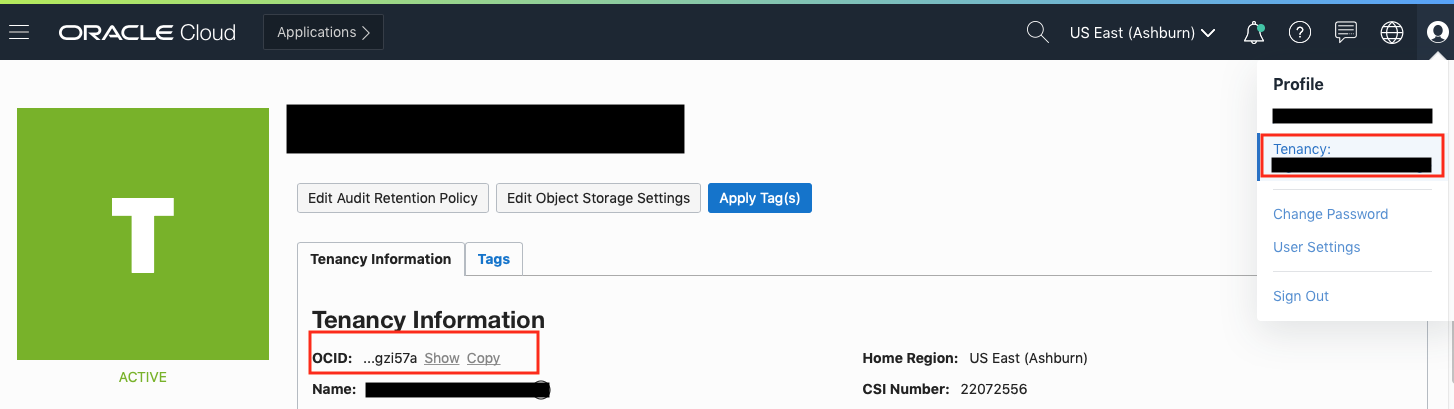

Similarly your user OCID can be found in the `Profile` section of your avatar menu: 

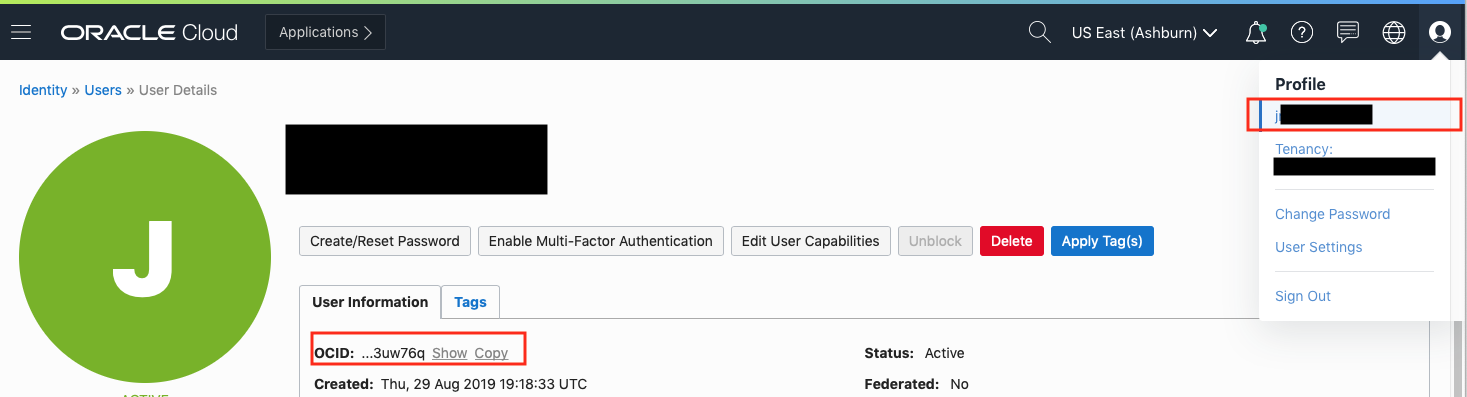

Before running the cell below, make sure you have inserted your tenancy and user OCIDs as well as your tenancy region in the cell. The output of the cell should show you the content of your configuration file. 

In [1]:
%%bash 

# Variables You need to assign: 

# Insert your tenancy OCID:
export TENANCY_OCID=ocid1.tenancy.oc1..aaaaaaaaro7aox2fclu4urtpgsbacnrmjv46e7n4fw3sc2wbq24l7dzf3kba
# Insert your Tenancy region name. For example, us-ashburn-1 for Ashburn region: 
export OCI_REGION=ap-tokyo-1
# Insert your user OCIC only if you are an IDCS user (see screenshot above)
export USER_OCID=ocid1.user.oc1..aaaaaaaadzgcynjii33bxqddye5kgedaer2z6mrplwbr555du3josebwbxaq

# --------------------------------------------------------

export BLOCK_STORAGE_PATH=/home/datascience/block_storage
rm -rf ${BLOCK_STORAGE_PATH}/.oci 
rm -rf /home/datascience/.oci

oci setup keys --output-dir ${BLOCK_STORAGE_PATH}/.oci --overwrite --passphrase 'a' > tmp_file
export FINGERPRINT=$(grep "Public key fingerprint: " tmp_file | cut -c 25-)

echo [DEFAULT] > ${BLOCK_STORAGE_PATH}/.oci/config
echo user = $USER_OCID >> ${BLOCK_STORAGE_PATH}/.oci/config
echo fingerprint = $FINGERPRINT >> ${BLOCK_STORAGE_PATH}/.oci/config
echo tenancy = $TENANCY_OCID >> ${BLOCK_STORAGE_PATH}/.oci/config 
echo region = $OCI_REGION >> ${BLOCK_STORAGE_PATH}/.oci/config
echo key_file = ~/.oci/oci_api_key.pem >> ${BLOCK_STORAGE_PATH}/.oci/config
echo pass_phrase=a >> ${BLOCK_STORAGE_PATH}/.oci/config
ln -s ${BLOCK_STORAGE_PATH}/.oci /home/datascience/.oci
oci setup repair-file-permissions --file /home/datascience/.oci/config 
rm ./tmp_file

# print the content of your configuration file: 
echo "The content of your configuration file:"
echo ""
head -n 15 ${BLOCK_STORAGE_PATH}/.oci/config

The content of your configuration file:

[DEFAULT]
user = ocid1.user.oc1..aaaaaaaadzgcynjii33bxqddye5kgedaer2z6mrplwbr555du3josebwbxaq
fingerprint = 9f:17:7d:26:16:2a:af:1f:f3:68:be:67:88:4a:94:5e
tenancy = ocid1.tenancy.oc1..aaaaaaaaro7aox2fclu4urtpgsbacnrmjv46e7n4fw3sc2wbq24l7dzf3kba
region = ap-tokyo-1
key_file = /home/datascience/.oci/oci_api_key.pem
pass_phrase=a


***

The final step in your setup is to copy the public key in the OCI console. Execute the cell below and paste the result in the console as shown in the console snapshots below: 

In [3]:
%%bash 

echo "*** Please copy the api key below and paste into the OCI Console ***"
echo " "
cat /home/datascience/.oci/oci_api_key_public.pem

*** Please copy the api key below and paste into the OCI Console ***
 
-----BEGIN PUBLIC KEY-----
MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEA5Pn4imnxBCUjuQ29aXqw
dzazYQHmln5GxvIpOlwkxVTglOvNUSSZPkHbORJZEf7LvjNXTx9C9o5RDa4hAqJ+
qWCMqBETfLlfPWnzoep16mLJBWa+BaLOCx9JlMS+tnn7qj7etbHunaCzL0UViOVM
cfqGw92jwFFEpGPkku0Qfq9XY7bJA5D7p7S8grNBpWEZGeN8QEx4PGbd7pzGTk7o
8U4zaR+fZHxvNu9ooQuH5CvYS5IxlDJIIzFinCq3tWe/1xIq9GeZqYzgegYxho71
sdoGKRfzLzFIgbSt9rPJda1JUgowo5mMgVo/ffy2VsNqdnxZEY2UFSotcXRY5k3e
dwIDAQAB
-----END PUBLIC KEY-----


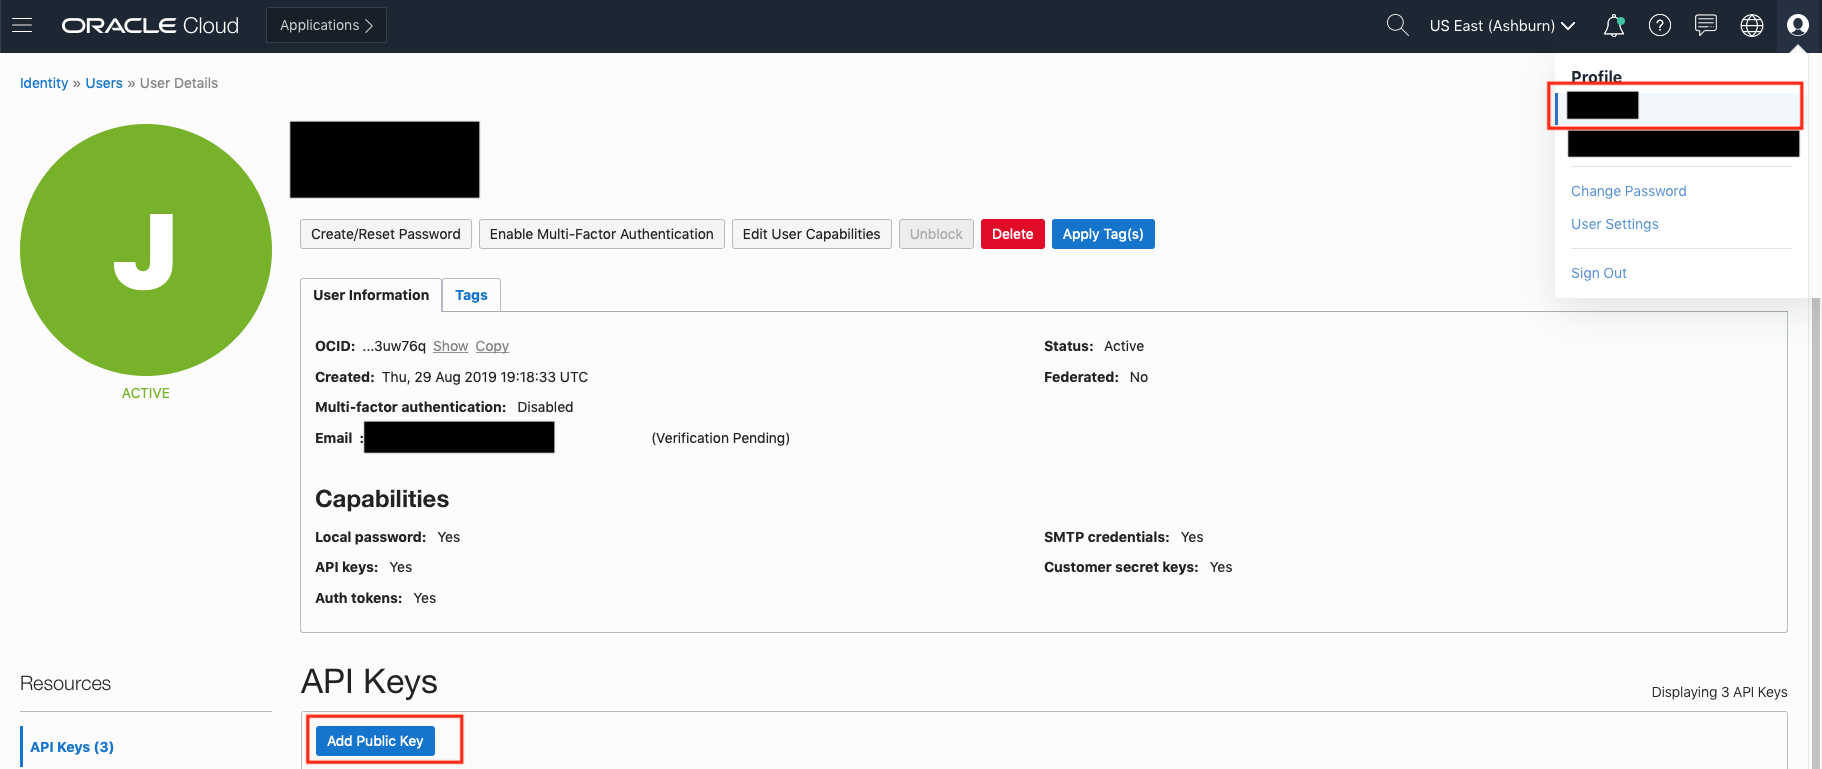

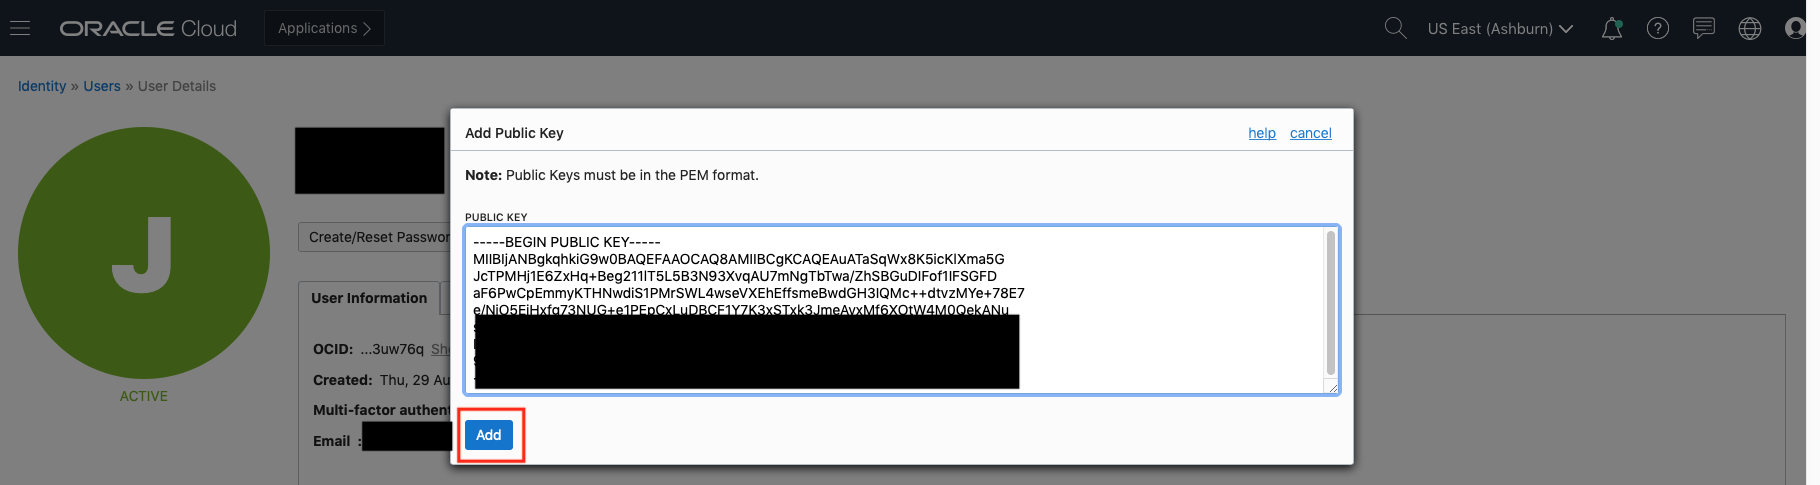

<a id='access-test'></a>
### Testing the Access to our API

After you have copied the public key in the console, execute the cell below: 

In [5]:
%%bash 

oci data-science project get --project-id=ocid1.datascienceproject.oc1.ap-tokyo-1.amaaaaaaak7gbria5nat442i7cewuoppffp3chrwnspdeuumvagrvr7yf7bq

{
  "data": {
    "compartment-id": "ocid1.compartment.oc1..aaaaaaaafikbm6arojf6jujm3j5v6bsl6h76mdqnsxe2nzt6cj7cykf5nvca",
    "created-by": "ocid1.saml2idp.oc1..aaaaaaaa35cermlivp7qpgci4ch7l6msrtze7wnvde6gsio2juyxdnpzi5na/bob.fei@oracle.com",
    "defined-tags": {},
    "description": null,
    "display-name": "DSHandsOn",
    "freeform-tags": {},
    "id": "ocid1.datascienceproject.oc1.ap-tokyo-1.amaaaaaaak7gbria5nat442i7cewuoppffp3chrwnspdeuumvagrvr7yf7bq",
    "lifecycle-state": "ACTIVE",
    "time-created": "2020-03-13T07:33:14.070000+00:00"
  },
  "etag": "c4c000108b12158960b2f56c5db299905dd1e92e8db5e42d496100ec72eda7ee"
}


You should see an output similar to: 

```
{
  "data": {
    "compartment-id": "ocid1.compartment.oc1..aaaaaaaafl3avkal72rrwuy4m5rumpwh7r4axejjwq5hvwjy4h4uoyi7kzyq",
    "created-by": "ocid1.user.oc1..aaaaaaaabfrlcbiyvjmjvgh3ns6trdyoewxytqywwta3yqmy3ah3fa3uw76q",
    "defined-tags": {},
    "description": "my favorite demo project\n",
    "display-name": "jr-demo-project",
    "freeform-tags": {},
    "id": "ocid1.datascienceproject.oc1.iad.aaaaaaaappvg4tp5kmbkurcyeghxaqmaknw3s5yh2oxcvfrvjeaadinsng6q",
    "lifecycle-state": "ACTIVE",
    "time-created": "2019-11-14T22:29:06.870000+00:00"
  },
  "etag": "b4d66fb733748f3454206d5de6b9acb3634edc804b2ad1997bd69dc676035a89"
}
```

***

### Oracle Cloud Infrastructure Object Storage

[OCI Object Storage service](https://docs.cloud.oracle.com/iaas/Content/Object/Concepts/objectstorageoverview.htm) is an internet-scale, high-performance storage platform that offers reliable and cost-efficient data durability. The Object Storage service can store an unlimited amount of unstructured data of any content type, including analytic data and rich content, like images and videos.

To pull data from Object Storage, simply use `oci` or `ocis` as the source of your dataset. Specify the bucket name and the file you want to pull from object storage. In addition, configure the optional parameter `storage_options` and set the path to your OCI configuration file and the name of the profile you wish to use. Most likely you will use the same configuration file that you created in the `getting-started.ipynb` notebook.  This configuration will will be used to authenticate your user against object storage. 

E.g. : 

```
ds = DatasetFactory.open("oci://ds-test/my-favorite-dataset.csv", storage_options={"config":"~/.oci/config", "profile":"DEFAULT"}, delimiter=",")
```

In the cell below we show you a snippet to connect to object storage: 

In [1]:
import pandas as pd
import numpy as np
from ads.dataset.factory import DatasetFactory
from ads.dataset.dataset_browser import DatasetBrowser
import ads

bucket_name = 'bucket-DS-Handson'
filename = 'orcl_attrition.csv'

ds = DatasetFactory.open("oci://{}/{}".format(bucket_name, filename), 
                             storage_options={"config":"~/block_storage/.oci/config", "profile":"DEFAULT"}, 
                             delimiter=",")

Using TensorFlow backend.
